# 1. 匯入套件

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import paho.mqtt.client as paho
from keras.models import load_model
from tensorflow.keras.utils import img_to_array

# 2. 讀取模型

In [ ]:
np.set_printoptions(suppress=True)
model = load_model("RecyclingModel.h5", compile=False)
class_names = ['else','paper','rock', 'scissors']

MQTT Topic

In [ ]:
broker = "mqttgo.io"
pic_topic = "team3/class406/pic"

# 3. 定義函數

預測圖片分類

In [ ]:
def predict_image(img):
    try:
        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
        img = np.asarray(img, dtype=np.float32).reshape(1, 224, 224, 3)
        img = img / 255.0 #正規化

        pred = model.predict(img)
        index = np.argmax(pred)
        class_name = class_names[index]
        confidence_score = pred[0][index]

        return class_name, confidence_score

    except Exception as e:
        print(f"Error in prediction: {e}")
        return "None", 0

儲存圖片(訓練模型用)

In [49]:
import os
from datetime import datetime

def save_picture(output_folder, message):
    file_name = datetime.utcnow().strftime('%Y%m%d_%H%M%S_%f')[:-3] + '.jpg'
    file_path = os.path.join(output_folder, file_name)

    os.makedirs(output_folder, exist_ok=True)

    with open(file_path, "wb") as f:
        f.write(message.payload)


預測圖片分類

In [ ]:
# MQTT接收到新資料時觸發
def on_message(client, userdata, message):
    print("Receiving message")
    # print(message.topic)
    if message.topic == pic_topic:  # 比對主題
        img_array = np.frombuffer(message.payload, dtype=np.uint8)  # 轉換為 NumPy 陣列
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)  # 解碼為圖像
        if img is not None:  # 確認圖像是否有效
            class_idx, confidence = predict_image(img) # 預測分類
            prediction_text = f"Class: {class_idx}, Confidence: {confidence:.2f}"
            print(prediction_text)

            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # 轉換 BGR 到 RGB
            plt.axis('off')  # 關閉軸
            plt.title(prediction_text, fontsize=10, color='red')
            plt.show()

            # 儲存圖片
            # output_folder = "dataset/" + "validation/scissors/" # else paper rock scissors / train validation
            # save_picture(output_folder, message)
        else:
            print("Invalid image data received")

# 4. 接收MQTT資料

Starting


C:\Users\User\AppData\Local\Temp\ipykernel_1848\1023144980.py:25: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  MQTT_client = paho.Client()


Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Class: else, Confidence: 0.92


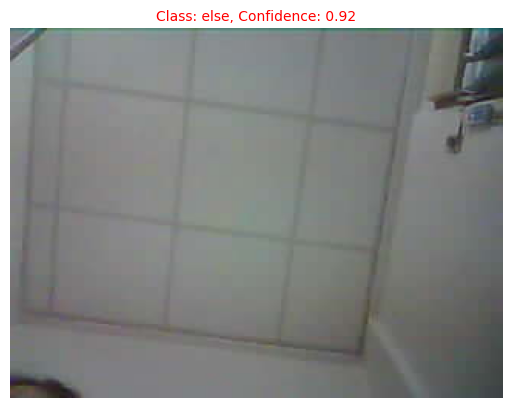

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Class: rock, Confidence: 0.90


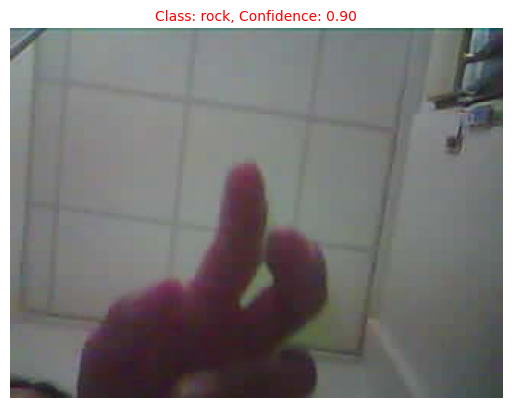

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: paper, Confidence: 0.85


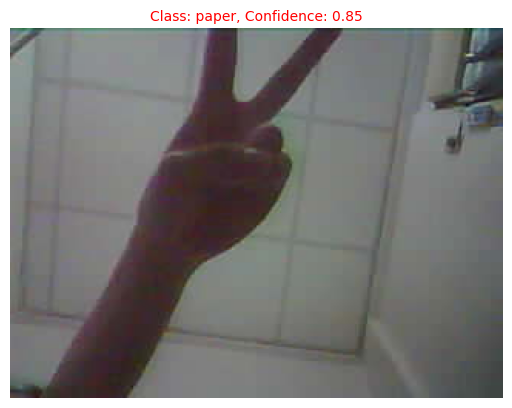

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: paper, Confidence: 0.71


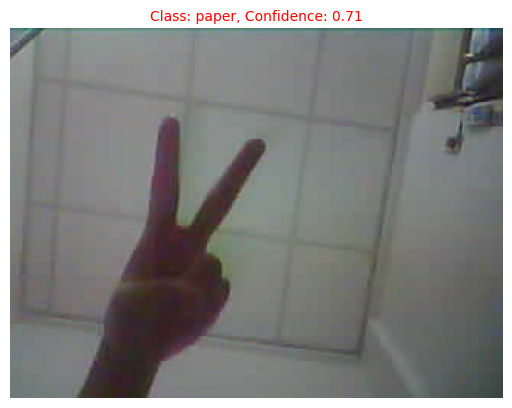

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: paper, Confidence: 0.56


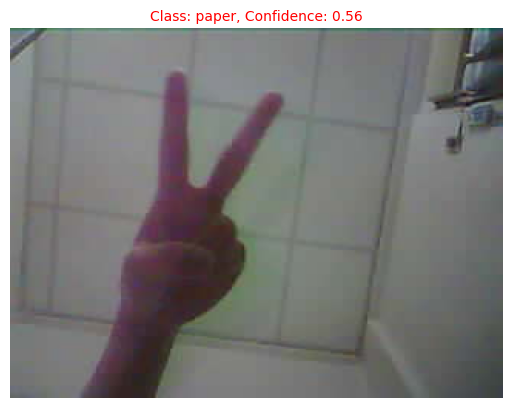

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: scissors, Confidence: 0.94


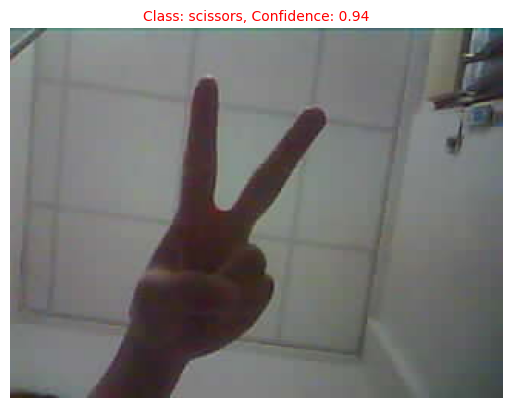

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Class: scissors, Confidence: 0.71


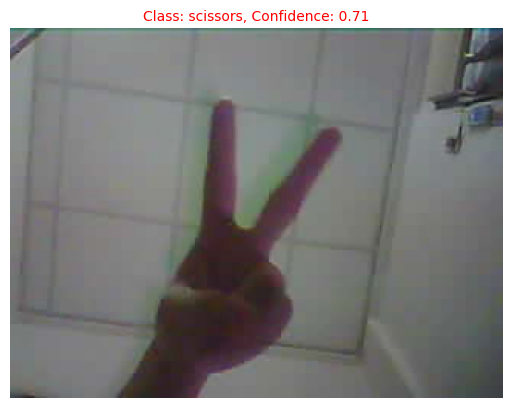

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Class: scissors, Confidence: 0.85


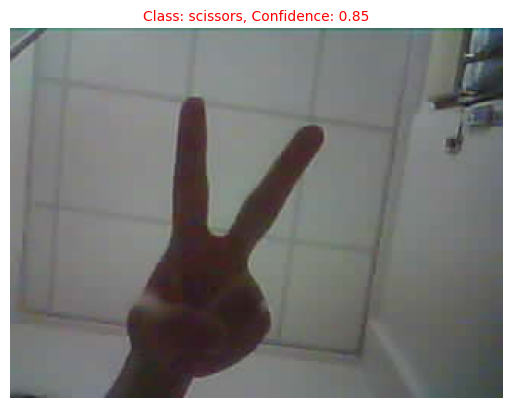

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: scissors, Confidence: 0.78


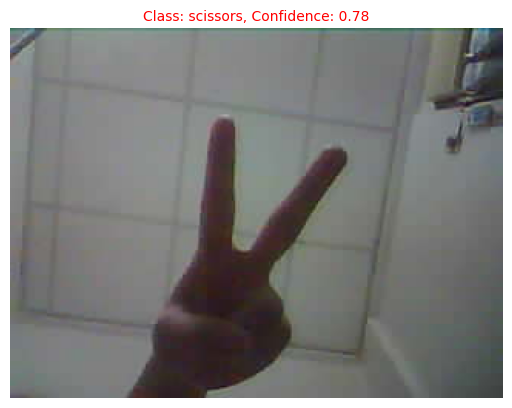

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Class: scissors, Confidence: 0.84


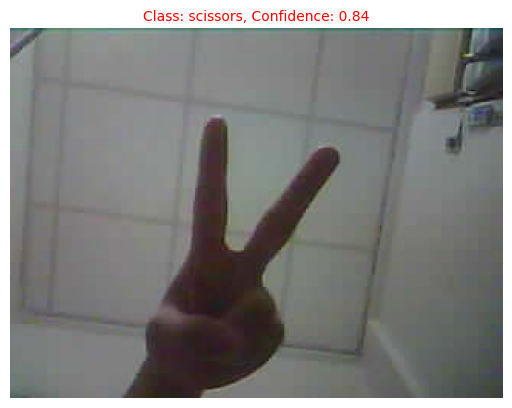

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Class: scissors, Confidence: 0.83


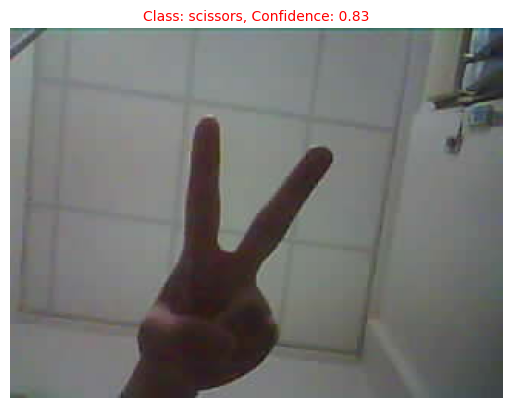

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: scissors, Confidence: 0.92


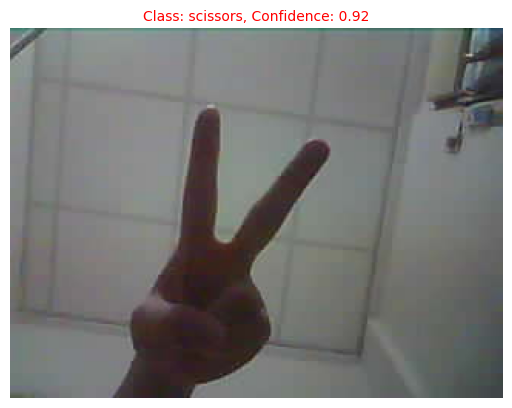

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Class: scissors, Confidence: 0.93


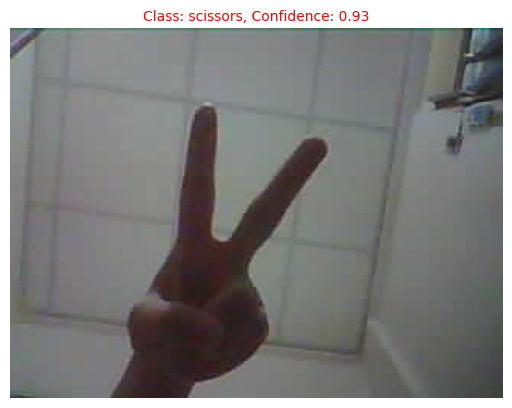

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Class: scissors, Confidence: 0.91


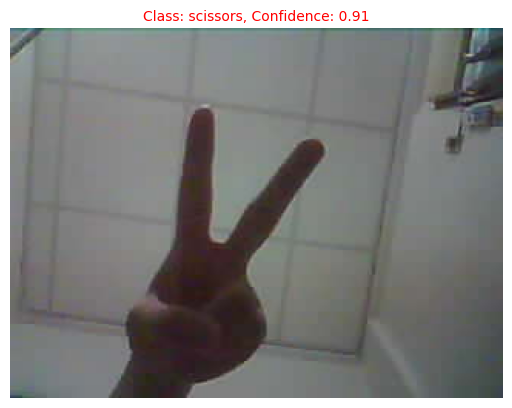

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Class: scissors, Confidence: 0.85


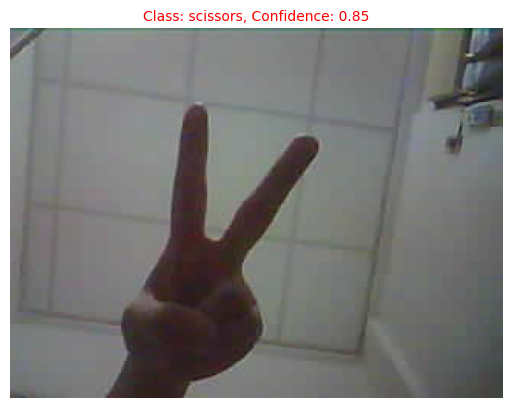

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: scissors, Confidence: 0.86


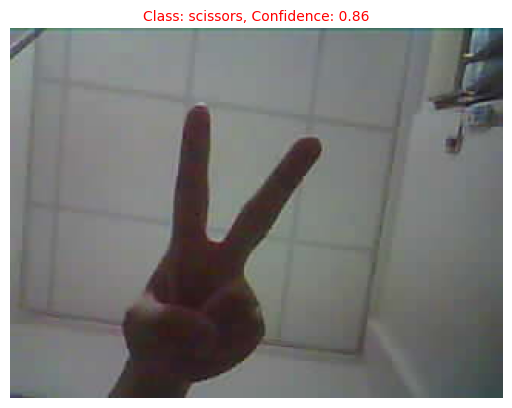

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Class: scissors, Confidence: 0.78


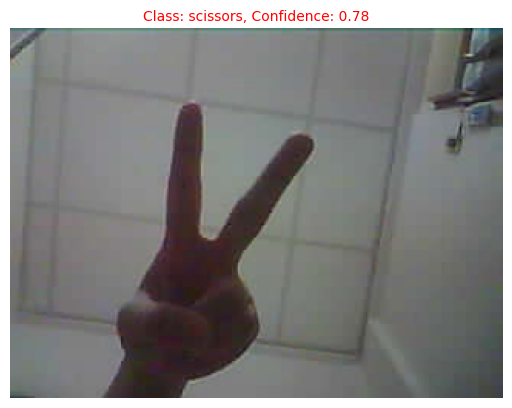

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Class: scissors, Confidence: 0.79


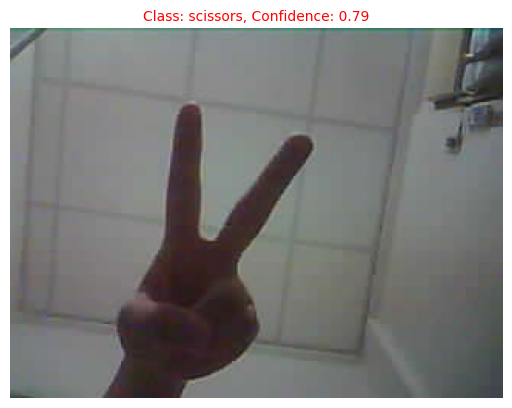

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Class: scissors, Confidence: 0.77


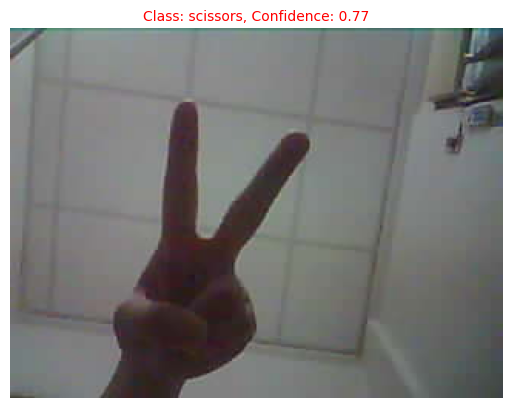

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: scissors, Confidence: 0.79


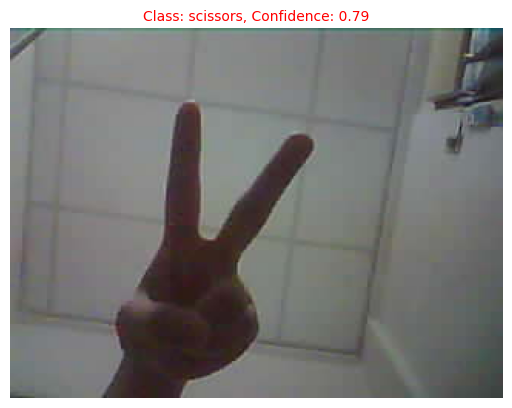

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Class: scissors, Confidence: 0.81


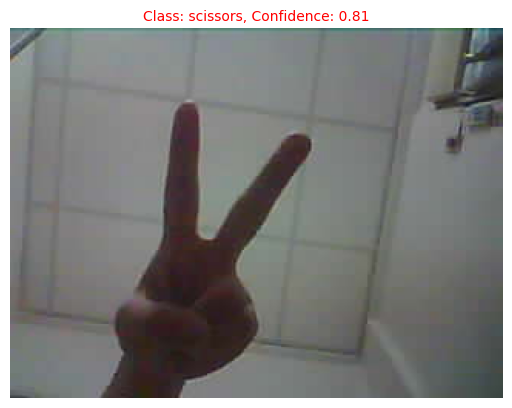

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Class: scissors, Confidence: 0.80


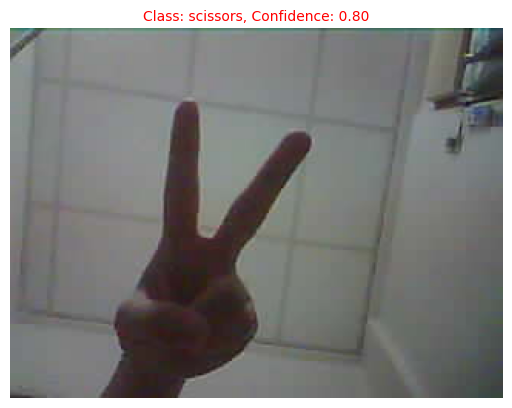

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: scissors, Confidence: 0.83


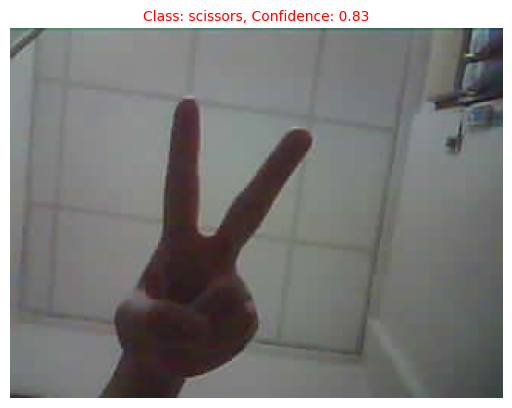

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: rock, Confidence: 0.68


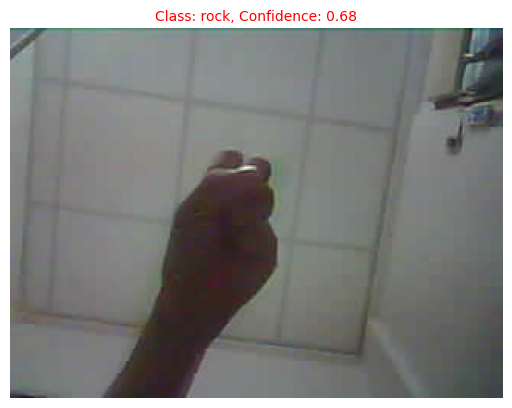

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Class: rock, Confidence: 0.72


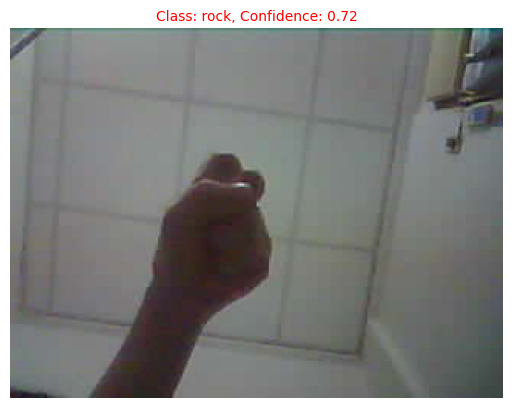

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: rock, Confidence: 0.70


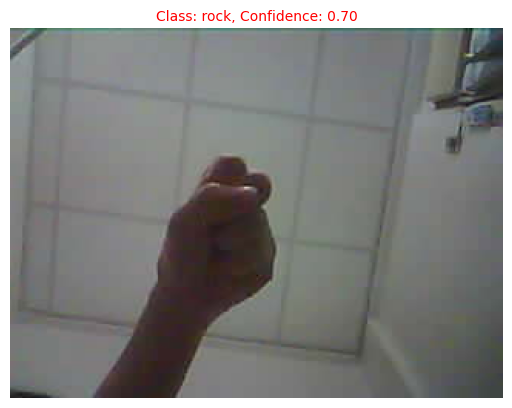

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: rock, Confidence: 0.69


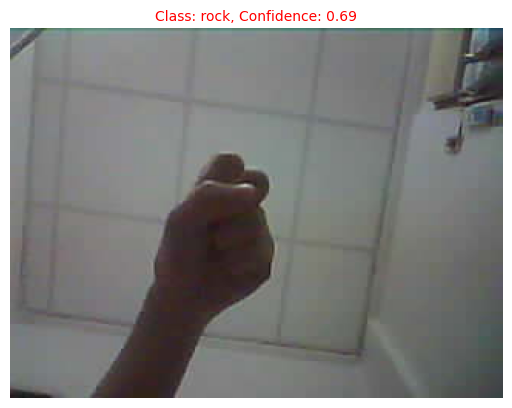

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Class: rock, Confidence: 0.73


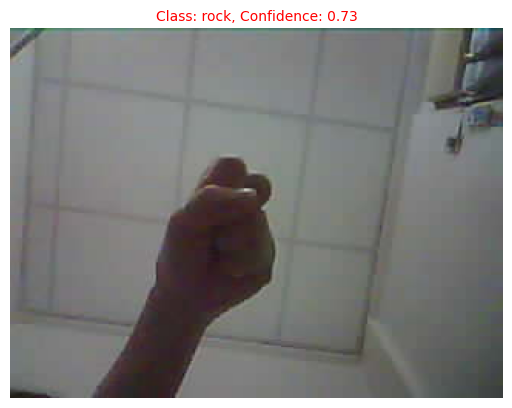

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Class: rock, Confidence: 0.75


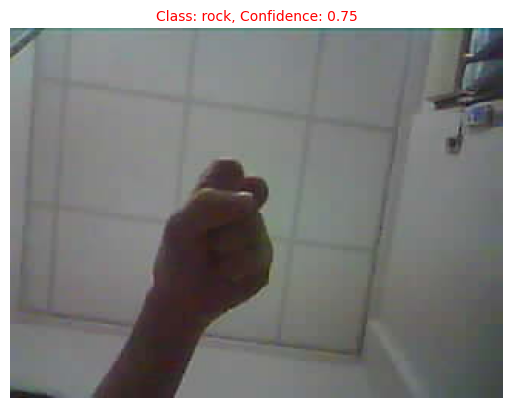

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Class: rock, Confidence: 0.73


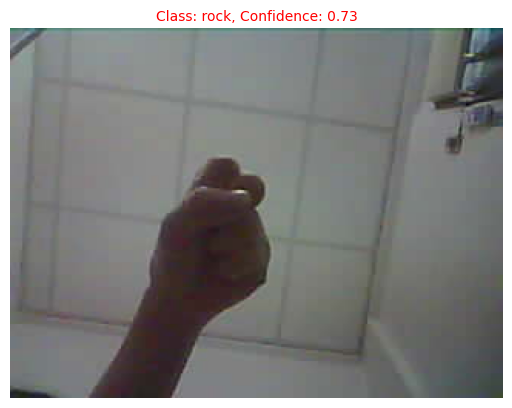

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: scissors, Confidence: 0.59


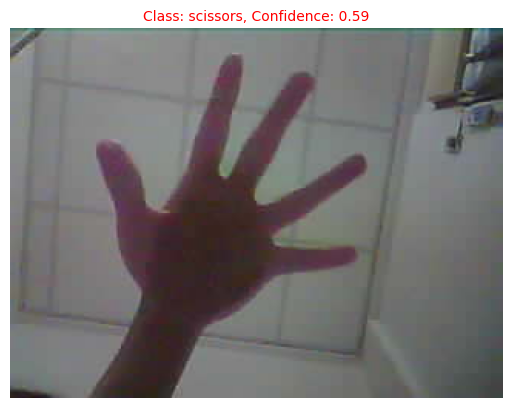

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Class: paper, Confidence: 0.85


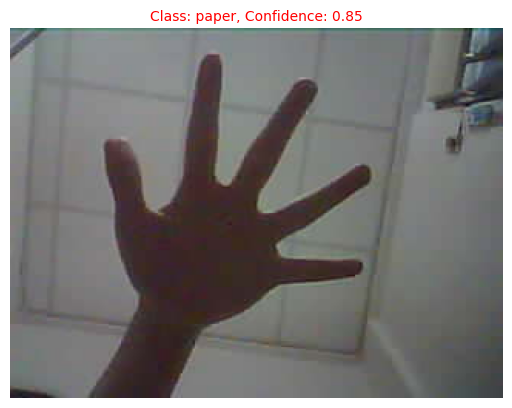

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Class: paper, Confidence: 0.96


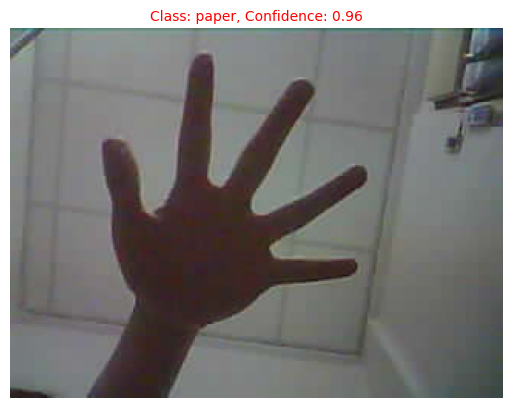

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: paper, Confidence: 0.98


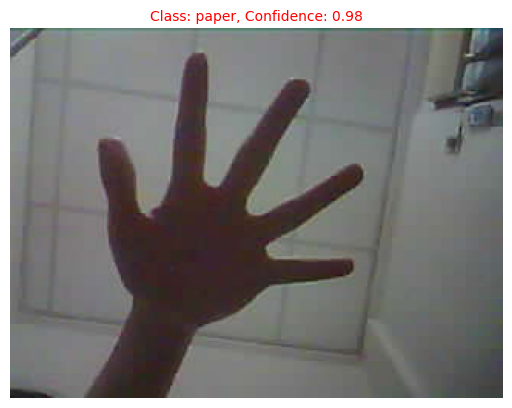

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: paper, Confidence: 0.99


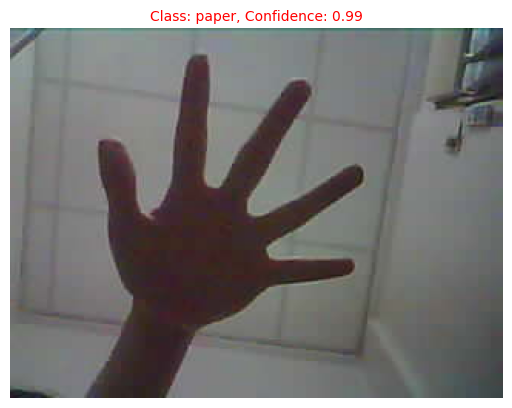

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Class: paper, Confidence: 0.99


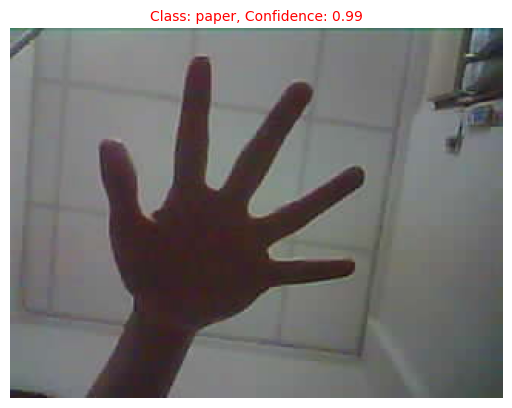

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Class: paper, Confidence: 0.99


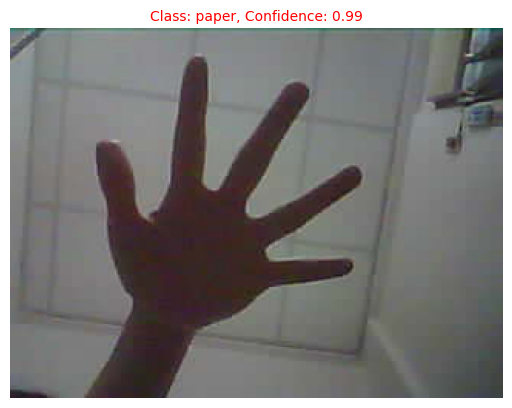

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: paper, Confidence: 0.99


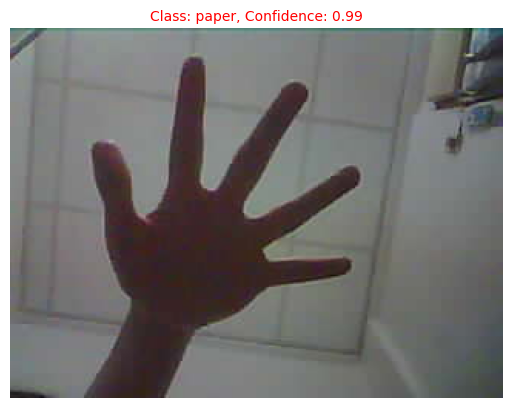

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Class: paper, Confidence: 0.99


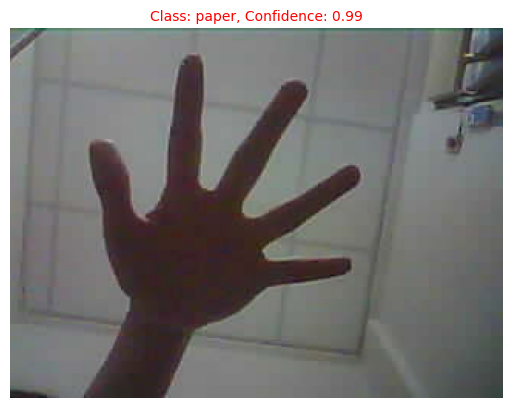

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: paper, Confidence: 0.99


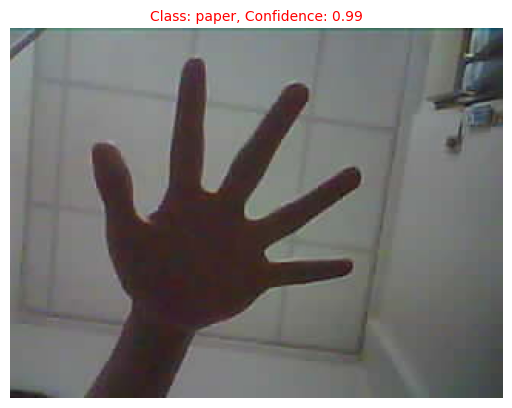

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class: paper, Confidence: 0.99


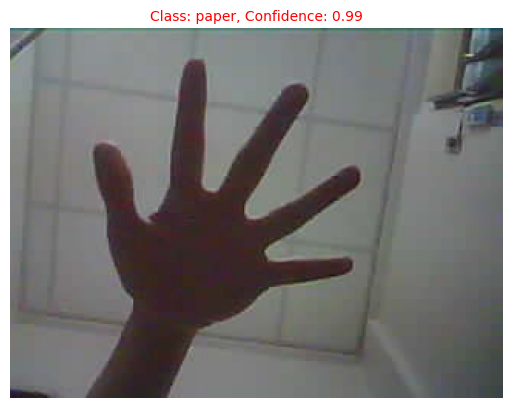

Receiving message
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Class: paper, Confidence: 0.99


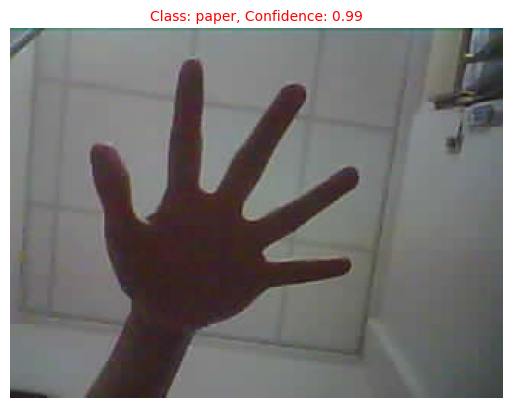

KeyboardInterrupt: 

In [ ]:
print("Starting")

MQTT_client = paho.Client()
MQTT_client.connect(broker)  # 連線
MQTT_client.subscribe(pic_topic)  # 訂閱
MQTT_client.on_message = on_message  # 指定訂閱處理副程式
MQTT_client.loop_forever()  # 不斷查詢訂閱